In [2]:
%matplotlib inline

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def applyKernel(image, kernel):
    padded_image = np.zeros((image.shape[0]+2, image.shape[1]+2, image.shape[2]))
    padded_image[1:-1:,1:-1:,:] = image
    filtered_image = np.zeros_like(image)
    for w in range(image.shape[1]):
        for h in range(image.shape[0]):
            for c in range(image.shape[2]):
                xstart = w
                xend = w + kernel.shape[0]
                ystart = h
                yend = h + kernel.shape[1]
                image_slice = padded_image[ystart: yend , xstart: xend, c]
                product = kernel * image_slice
                totalsum = np.sum(product)
                filtered_image[h, w, c] = totalsum
    return filtered_image

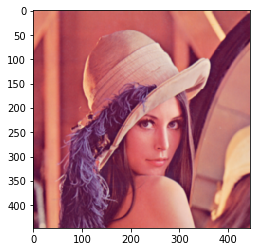

In [7]:
image = Image.open('filter.png')

box_kernel = np.array([[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]])

gaussian_kernel = np.array([[0.0625, 0.125, 0.0625],
                          [0.125, 0.25, 0.125],
                          [0.0625, 0.125, 0.0625]])

sharpen_kernel = np.array([[0, -0.5, 0],
                    [-0.5, 3, -0.5],
                    [0, -0.5, 0]])



img = np.array(image)
boxblur_image = Image.fromarray(applyKernel(img, box_kernel))
plt.imshow(boxblur_image)
# filtered_image.show()

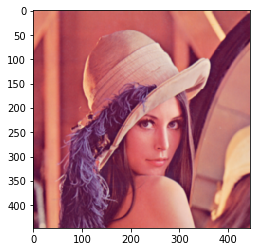

In [8]:
gaussianblur_image = Image.fromarray(applyKernel(img, gaussian_kernel))
plt.imshow(gaussianblur_image)

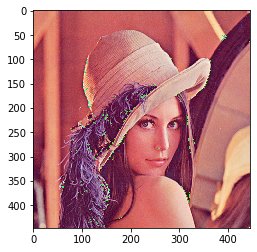

In [9]:
sharpen_image = Image.fromarray(applyKernel(img, sharpen_kernel))
plt.imshow(sharpen_image)